In [7]:
import pandas as pd

# Read in csv

edge_files = [
        'arm_edge_heterogeneous_InO_500',
        'arm_edge_heterogeneous_InO_502', 
        'arm_edge_heterogeneous_InO_505', 
        'arm_edge_heterogeneous_InO_520', 
        'arm_edge_heterogeneous_InO_523', 
        'arm_edge_heterogeneous_InO_525', 
        'arm_edge_heterogeneous_InO_531', 
        'arm_edge_heterogeneous_InO_541', 
        'arm_edge_heterogeneous_InO_548', 
        'arm_edge_heterogeneous_InO_557', 
        'arm_edge_heterogeneous_InO_503', 
        'arm_edge_heterogeneous_InO_507', 
        'arm_edge_heterogeneous_InO_508', 
        'arm_edge_heterogeneous_InO_510', 
        'arm_edge_heterogeneous_InO_511', 
        'arm_edge_heterogeneous_InO_519', 
        'arm_edge_heterogeneous_InO_521', 
        'arm_edge_heterogeneous_InO_527', 
        'arm_edge_heterogeneous_InO_538', 
        'arm_edge_heterogeneous_InO_544', 
        'arm_edge_heterogeneous_InO_549', 
        'arm_edge_heterogeneous_InO_554' 
]

edge_ooo_files = [
        'arm_edge_heterogeneous_OOO_500',
        'arm_edge_heterogeneous_OOO_502', 
        'arm_edge_heterogeneous_OOO_505', 
        'arm_edge_heterogeneous_OOO_520', 
        'arm_edge_heterogeneous_OOO_523', 
        'arm_edge_heterogeneous_OOO_525', 
        'arm_edge_heterogeneous_OOO_531', 
        'arm_edge_heterogeneous_OOO_541', 
        'arm_edge_heterogeneous_OOO_548', 
        'arm_edge_heterogeneous_OOO_557', 
        'arm_edge_heterogeneous_OOO_503', 
        'arm_edge_heterogeneous_OOO_507', 
        'arm_edge_heterogeneous_OOO_508', 
        'arm_edge_heterogeneous_OOO_510', 
        'arm_edge_heterogeneous_OOO_511', 
        'arm_edge_heterogeneous_OOO_519', 
        'arm_edge_heterogeneous_OOO_521', 
        'arm_edge_heterogeneous_OOO_527', 
        'arm_edge_heterogeneous_OOO_538', 
        'arm_edge_heterogeneous_OOO_544', 
        'arm_edge_heterogeneous_OOO_549', 
        'arm_edge_heterogeneous_OOO_554' 
]

desktop_files = [
        'arm_desktop_1.5GHz_500',
        'arm_desktop_1.5GHz_502', 
        'arm_desktop_1.5GHz_505', 
        'arm_desktop_1.5GHz_520', 
        'arm_desktop_1.5GHz_523', 
        'arm_desktop_1.5GHz_525', 
        'arm_desktop_1.5GHz_531', 
        'arm_desktop_1.5GHz_541', 
        'arm_desktop_1.5GHz_548', 
        'arm_desktop_1.5GHz_557', 
        'arm_desktop_1.5GHz_503', 
        'arm_desktop_1.5GHz_507', 
        'arm_desktop_1.5GHz_508', 
        'arm_desktop_1.5GHz_510', 
        'arm_desktop_1.5GHz_511', 
        'arm_desktop_1.5GHz_519', 
        'arm_desktop_1.5GHz_521', 
        'arm_desktop_1.5GHz_527', 
        'arm_desktop_1.5GHz_538', 
        'arm_desktop_1.5GHz_544', 
        'arm_desktop_1.5GHz_549', 
        'arm_desktop_1.5GHz_554'
]

server_files = [
        'arm_server_1.5GHz_500', 
        'arm_server_1.5GHz_502',
        'arm_server_1.5GHz_505',
        'arm_server_1.5GHz_520',
        'arm_server_1.5GHz_523',
        'arm_server_1.5GHz_525',
        'arm_server_1.5GHz_531',
        'arm_server_1.5GHz_541',
        'arm_server_1.5GHz_548',
        'arm_server_1.5GHz_557',
        'arm_server_1.5GHz_503',
        'arm_server_1.5GHz_507',
        'arm_server_1.5GHz_508',
        'arm_server_1.5GHz_510',
        'arm_server_1.5GHz_511',
        'arm_server_1.5GHz_519',
        'arm_server_1.5GHz_521',
        'arm_server_1.5GHz_527',
        'arm_server_1.5GHz_538',
        'arm_server_1.5GHz_544',
        'arm_server_1.5GHz_549',
        'arm_server_1.5GHz_554'
]
for csv in edge_files:
    df1 = pd.read_csv('inst_aligned_traces/arm_edge_heterogeneous/' + csv)
    df1 = df1[['instructions:u', 'cpu-cycles:u', 'armv8_pmuv3/br_pred/u', 'armv8_pmuv3/br_mis_pred/u', 'armv8_pmuv3/l1d_cache/u', 'armv8_pmuv3/l1i_cache/u', 'armv8_pmuv3/l1i_cache_refill/u', 'armv8_pmuv3/l2d_cache/u', 'armv8_pmuv3/l1d_tlb/u', 'armv8_pmuv3/l2d_tlb/u', 'armv8_pmuv3/mem_access/u']]
    df1 = df1.rename(columns={'instructions:u':'instructions', 'cpu-cycles:u':'cpu-cycles', 'armv8_pmuv3/br_pred/u':'br_pred', 'armv8_pmuv3/br_mis_pred/u':'br_mis_pred', 'armv8_pmuv3/l1d_cache/u':'l1d_cache', 'armv8_pmuv3/l1i_cache/u':'l1i_cache', 'armv8_pmuv3/l1i_cache_refill/u':'l1i_cache_refill', 'armv8_pmuv3/l2d_cache/u':'l2d_cache', 'armv8_pmuv3/l1d_tlb/u':'l1d_tlb', 'armv8_pmuv3/l2d_tlb/u':'l2d_tlb', 'armv8_pmuv3/mem_access/u':'mem_access'})
    df1.to_csv('PCA/' + csv + '.csv')

for csv in edge_ooo_files:
    df1 = pd.read_csv('inst_aligned_traces/arm_edge_heterogeneous/' + csv)
    df1 = df1[['instructions:u', 'cpu-cycles:u', 'armv8_pmuv3/br_pred/u', 'armv8_pmuv3/br_mis_pred/u', 'armv8_pmuv3/l1d_cache/u', 'armv8_pmuv3/l1i_cache/u', 'armv8_pmuv3/l1i_cache_refill/u', 'armv8_pmuv3/l2d_cache/u', 'armv8_pmuv3/l1d_tlb/u', 'armv8_pmuv3/l2d_tlb/u', 'armv8_pmuv3/mem_access/u']]
    df1 = df1.rename(columns={'instructions:u':'instructions', 'cpu-cycles:u':'cpu-cycles', 'armv8_pmuv3/br_pred/u':'br_pred', 'armv8_pmuv3/br_mis_pred/u':'br_mis_pred', 'armv8_pmuv3/l1d_cache/u':'l1d_cache', 'armv8_pmuv3/l1i_cache/u':'l1i_cache', 'armv8_pmuv3/l1i_cache_refill/u':'l1i_cache_refill', 'armv8_pmuv3/l2d_cache/u':'l2d_cache', 'armv8_pmuv3/l1d_tlb/u':'l1d_tlb', 'armv8_pmuv3/l2d_tlb/u':'l2d_tlb', 'armv8_pmuv3/mem_access/u':'mem_access'})
    df1.to_csv('PCA/' + csv + '.csv')

for csv in desktop_files:
    df1 = pd.read_csv('inst_aligned_traces/arm_desktop/' + csv)
    df1 = df1[['instructions', 'cpu-cycles', 'br_pred', 'br_mis_pred', 'l1d_cache', 'l1i_cache', 'l1i_cache_refill', 'l2d_cache', 'l1d_tlb', 'l2d_tlb_access', 'mem_access']]
    df1 = df1.rename(columns={'l2d_tlb_access':'l2d_tlb'})

    df1.to_csv('PCA/' + csv + '.csv')

for csv in server_files:
    df1 = pd.read_csv('inst_aligned_traces/arm_server/' + csv)
    df1 = df1[['instructions', 'cpu-cycles', 'br_pred', 'br_mis_pred', 'l1d_cache', 'l1i_cache', 'l1i_cache_refill', 'l2d_cache', 'l1d_tlb', 'l2d_tlb', 'mem_access']]
    
    df1.to_csv('PCA/' + csv + '.csv')

In [8]:
import pandas as pd          

edge_files = [
        'arm_edge_heterogeneous_InO_500',
        'arm_edge_heterogeneous_InO_502', 
        'arm_edge_heterogeneous_InO_505', 
        'arm_edge_heterogeneous_InO_520', 
        'arm_edge_heterogeneous_InO_523', 
        'arm_edge_heterogeneous_InO_525', 
        'arm_edge_heterogeneous_InO_531', 
        'arm_edge_heterogeneous_InO_541', 
        'arm_edge_heterogeneous_InO_548', 
        'arm_edge_heterogeneous_InO_557', 
        'arm_edge_heterogeneous_InO_503', 
        'arm_edge_heterogeneous_InO_507', 
        'arm_edge_heterogeneous_InO_508', 
        'arm_edge_heterogeneous_InO_510', 
        'arm_edge_heterogeneous_InO_511', 
        'arm_edge_heterogeneous_InO_519', 
        'arm_edge_heterogeneous_InO_521', 
        'arm_edge_heterogeneous_InO_527', 
        'arm_edge_heterogeneous_InO_538', 
        'arm_edge_heterogeneous_InO_544', 
        'arm_edge_heterogeneous_InO_549', 
        'arm_edge_heterogeneous_InO_554' 
]

edge_ooo_files = [
        'arm_edge_heterogeneous_OOO_500',
        'arm_edge_heterogeneous_OOO_502', 
        'arm_edge_heterogeneous_OOO_505', 
        'arm_edge_heterogeneous_OOO_520', 
        'arm_edge_heterogeneous_OOO_523', 
        'arm_edge_heterogeneous_OOO_525', 
        'arm_edge_heterogeneous_OOO_531', 
        'arm_edge_heterogeneous_OOO_541', 
        'arm_edge_heterogeneous_OOO_548', 
        'arm_edge_heterogeneous_OOO_557', 
        'arm_edge_heterogeneous_OOO_503', 
        'arm_edge_heterogeneous_OOO_507', 
        'arm_edge_heterogeneous_OOO_508', 
        'arm_edge_heterogeneous_OOO_510', 
        'arm_edge_heterogeneous_OOO_511', 
        'arm_edge_heterogeneous_OOO_519', 
        'arm_edge_heterogeneous_OOO_521', 
        'arm_edge_heterogeneous_OOO_527', 
        'arm_edge_heterogeneous_OOO_538', 
        'arm_edge_heterogeneous_OOO_544', 
        'arm_edge_heterogeneous_OOO_549', 
        'arm_edge_heterogeneous_OOO_554' 
]

desktop_files = [
        'arm_desktop_1.5GHz_500',
        'arm_desktop_1.5GHz_502', 
        'arm_desktop_1.5GHz_505', 
        'arm_desktop_1.5GHz_520', 
        'arm_desktop_1.5GHz_523', 
        'arm_desktop_1.5GHz_525', 
        'arm_desktop_1.5GHz_531', 
        'arm_desktop_1.5GHz_541', 
        'arm_desktop_1.5GHz_548', 
        'arm_desktop_1.5GHz_557', 
        'arm_desktop_1.5GHz_503', 
        'arm_desktop_1.5GHz_507', 
        'arm_desktop_1.5GHz_508', 
        'arm_desktop_1.5GHz_510', 
        'arm_desktop_1.5GHz_511', 
        'arm_desktop_1.5GHz_519', 
        'arm_desktop_1.5GHz_521', 
        'arm_desktop_1.5GHz_527', 
        'arm_desktop_1.5GHz_538', 
        'arm_desktop_1.5GHz_544', 
        'arm_desktop_1.5GHz_549', 
        'arm_desktop_1.5GHz_554'
]

server_files = [
        'arm_server_1.5GHz_500', 
        'arm_server_1.5GHz_502',
        'arm_server_1.5GHz_505',
        'arm_server_1.5GHz_520',
        'arm_server_1.5GHz_523',
        'arm_server_1.5GHz_525',
        'arm_server_1.5GHz_531',
        'arm_server_1.5GHz_541',
        'arm_server_1.5GHz_548',
        'arm_server_1.5GHz_557',
        'arm_server_1.5GHz_503',
        'arm_server_1.5GHz_507',
        'arm_server_1.5GHz_508',
        'arm_server_1.5GHz_510',
        'arm_server_1.5GHz_511',
        'arm_server_1.5GHz_519',
        'arm_server_1.5GHz_521',
        'arm_server_1.5GHz_527',
        'arm_server_1.5GHz_538',
        'arm_server_1.5GHz_544',
        'arm_server_1.5GHz_549',
        'arm_server_1.5GHz_554'
]

file_names   = ['500.csv', '502.csv', '505.csv', '520.csv', '523.csv', '525.csv', '531.csv', '541.csv', '548.csv', '557.csv', '503.csv', '507.csv', '508.csv', '510.csv', '511.csv', '519.csv', '521.csv', '527.csv', '538.csv', '544.csv', '549.csv', '554.csv']

for csv in range(0,len(edge_files)):
    df1 = pd.read_csv('PCA/' + edge_files[csv] + '.csv')
    df1 = df1.apply(pd.to_numeric,errors='coerce').fillna(0)
    df1.insert(0,'core', 0)
    df1 = df1.reset_index(drop=True)
    df1 = df1.drop('Unnamed: 0', axis=1)

    df2 = pd.read_csv('PCA/' + edge_ooo_files[csv] + '.csv')
    df2 = df2.apply(pd.to_numeric,errors='coerce').fillna(0)
    df2.insert(0,'core', 1)
    df2 = df2.reset_index(drop=True)
    df2 = df2.drop('Unnamed: 0', axis=1)
    
    df3 = pd.read_csv('PCA/' + desktop_files[csv] + '.csv')
    df3 = df3.apply(pd.to_numeric,errors='coerce').fillna(0)
    df3.insert(0,'core', 2)
    df3 = df3.reset_index(drop=True)    
    df3 = df3.drop('Unnamed: 0', axis=1)

    df4 = pd.read_csv('PCA/' + server_files[csv] + '.csv')
    df4 = df4.apply(pd.to_numeric,errors='coerce').fillna(0)
    df4.insert(0,'core', 3)
    df4 = df4.reset_index(drop=True)
    df4 = df4.drop('Unnamed: 0', axis=1)

    df1.to_csv('PCA/edge_test.csv', index=False)
    df2.to_csv('PCA/edge_ooo_test.csv', index=False)
    df3.to_csv('PCA/desktop_test.csv', index=False)
    df4.to_csv('PCA/server_test.csv', index=False)
    
    df5 = pd.concat([df1,df2,df3, df4], ignore_index=True, sort=False)
    df5 = df5.reset_index(drop=True)
    df5.to_csv('PCA/' + file_names[csv], index=False)

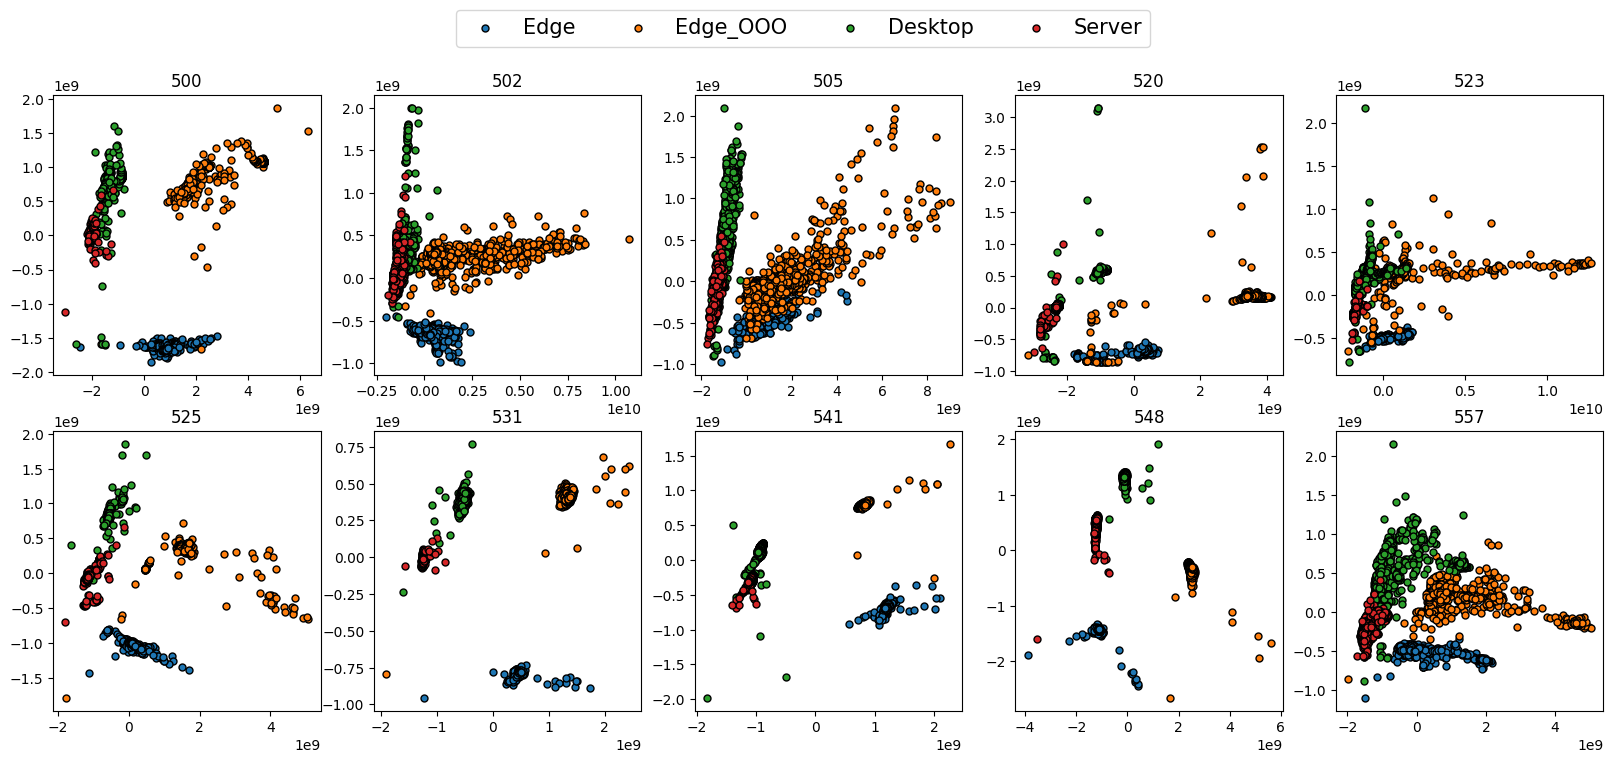

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math
import seaborn as sns

fig, ax = plt.subplots(2,5,figsize=(20,8))
ax[0][0].plot()
ax[0][0].set_title('500')
ax[0][1].plot()
ax[0][1].set_title('502')
ax[0][2].plot()
ax[0][2].set_title('505')
ax[0][3].plot()
ax[0][3].set_title('520')
ax[0][4].plot()
ax[0][4].set_title('523')
ax[1][0].plot()
ax[1][0].set_title('525')
ax[1][1].plot()
ax[1][1].set_title('531')
ax[1][2].plot()
ax[1][2].set_title('541')
ax[1][3].plot()
ax[1][3].set_title('548')
ax[1][4].plot()
ax[1][4].set_title('557')

csv_list = ['500.csv','502.csv','505.csv','520.csv','523.csv','525.csv','531.csv','541.csv','548.csv','557.csv']

for csv in range(0,len(csv_list)):
    df1 = pd.read_csv('PCA/' + csv_list[csv])
    df1 = df1.apply(pd.to_numeric,errors='coerce').fillna(0)
    
    # Extract features
    features = ['instructions', 'cpu-cycles', 'br_pred', 'br_mis_pred', 'l1d_cache', 'l1i_cache', 'l1i_cache_refill', 'l2d_cache', 'l1d_tlb', 'l1d_tlb', 'mem_access']
    X = df1[features]
    Y = df1['core']

    pca1 = PCA(n_components=2)
    pca1_features = pca1.fit_transform(X)
  
    pca1_df = pd.DataFrame(
        data=pca1_features,
        columns=['PC1','PC2'])

    target_names = {
        0:'edge',
        1:'edge_OOO',
        2:'desktop',
        3:'server',
    }

    pca1_df['target'] = Y
    pca1_df['target'] = pca1_df['target'].map(target_names)
    
    if csv == 0:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
    
    elif csv == 1:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 2:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 3:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 4:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 5:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 6:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 7:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 8:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 9:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
        
fig.legend(['Edge', 'Edge_OOO', 'Desktop', 'Server'], bbox_to_anchor=(0.5,1), loc='upper center', ncol=4,fontsize=15) 
plt.savefig('PCA/PCA_intrate.pdf')
plt.show()

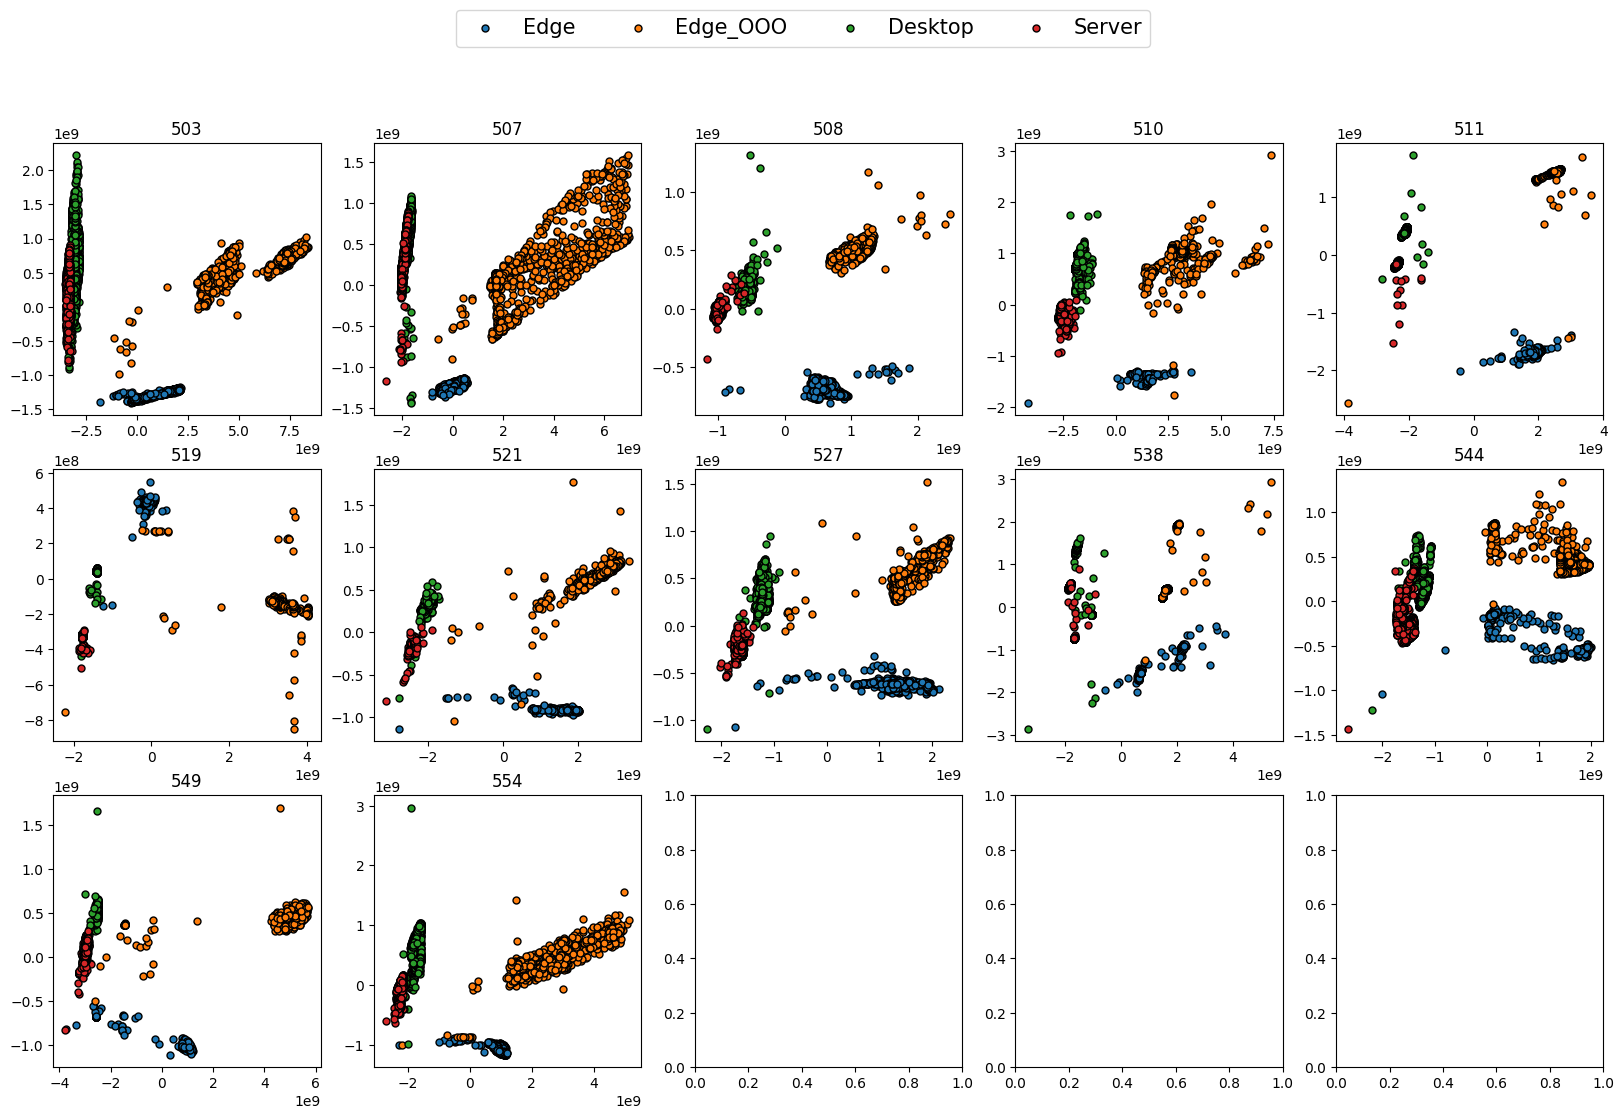

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math
import seaborn as sns

fig, ax = plt.subplots(3,5,figsize=(20,12))
ax[0][0].plot()
ax[0][0].set_title('503')
ax[0][1].plot()
ax[0][1].set_title('507')
ax[0][2].plot()
ax[0][2].set_title('508')
ax[0][3].plot()
ax[0][3].set_title('510')
ax[0][4].plot()
ax[0][4].set_title('511')
ax[1][0].plot()
ax[1][0].set_title('519')
ax[1][1].plot()
ax[1][1].set_title('521')
ax[1][2].plot()
ax[1][2].set_title('527')
ax[1][3].plot()
ax[1][3].set_title('538')
ax[1][4].plot()
ax[1][4].set_title('544')
ax[2][0].plot()
ax[2][0].set_title('549')
ax[2][1].plot()
ax[2][1].set_title('554')

csv_list = ['503.csv', '507.csv', '508.csv', '510.csv', '511.csv', '519.csv', '521.csv', '527.csv', '538.csv', '544.csv', '549.csv', '554.csv']

for csv in range(0,len(csv_list)):
    df1 = pd.read_csv('PCA/' + csv_list[csv])
    df1 = df1.apply(pd.to_numeric,errors='coerce').fillna(0)
    
    # Extract features
    features = ['instructions', 'cpu-cycles', 'br_pred', 'br_mis_pred', 'l1d_cache', 'l1i_cache', 'l1i_cache_refill', 'l2d_cache', 'l1d_tlb', 'l1d_tlb', 'mem_access']
    X = df1[features]
    Y = df1['core']

    pca1 = PCA(n_components=2)
    pca1_features = pca1.fit_transform(X)
  
    pca1_df = pd.DataFrame(
        data=pca1_features,
        columns=['PC1','PC2'])

    target_names = {
        0:'edge',
        1:'edge_OOO',
        2:'desktop',
        3:'server',
    }

    pca1_df['target'] = Y
    pca1_df['target'] = pca1_df['target'].map(target_names)
    
    if csv == 0:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
    
    elif csv == 1:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 2:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 3:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 4:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 5:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 6:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 7:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 8:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 9:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 10:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[2][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 11:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[2][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

fig.legend(['Edge', 'Edge_OOO', 'Desktop', 'Server'], bbox_to_anchor=(0.5,1), loc='upper center', ncol=4,fontsize=15) 
plt.savefig('PCA/PCA_fprate.pdf')
plt.show()

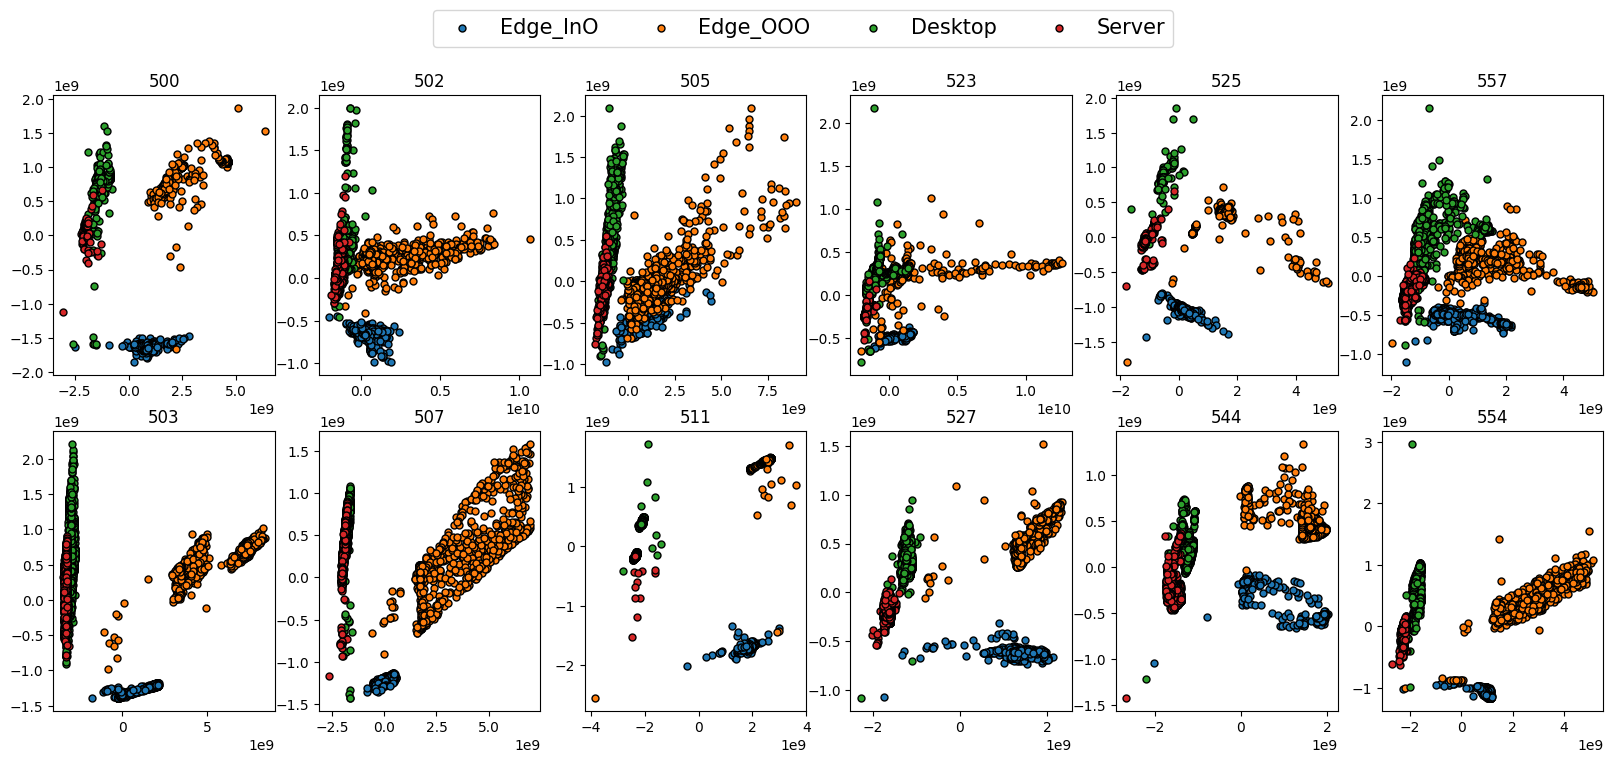

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math
import seaborn as sns

fig, ax = plt.subplots(2,6,figsize=(20,8))
ax[0][0].plot()
ax[0][0].set_title('500')
ax[0][1].plot()
ax[0][1].set_title('502')
ax[0][2].plot()
ax[0][2].set_title('505')
ax[0][3].plot()
ax[0][3].set_title('523')
ax[0][4].plot()
ax[0][4].set_title('525')
ax[0][5].plot()
ax[0][5].set_title('557')
ax[1][0].plot()
ax[1][0].set_title('503')
ax[1][1].plot()
ax[1][1].set_title('507')
ax[1][2].plot()
ax[1][2].set_title('511')
ax[1][3].plot()
ax[1][3].set_title('527')
ax[1][4].plot()
ax[1][4].set_title('544')
ax[1][5].plot()
ax[1][5].set_title('554')
csv_list = ['500.csv', '502.csv', '505.csv', '523.csv', '525.csv', '557.csv', '503.csv', '507.csv', '511.csv', '527.csv', '544.csv', '554.csv']

for csv in range(0,len(csv_list)):
    df1 = pd.read_csv('PCA/' + csv_list[csv])
    df1 = df1.apply(pd.to_numeric,errors='coerce').fillna(0)
    
    # Extract features
    features = ['instructions', 'cpu-cycles', 'br_pred', 'br_mis_pred', 'l1d_cache', 'l1i_cache', 'l1i_cache_refill', 'l2d_cache', 'l1d_tlb', 'l1d_tlb', 'mem_access']
    X = df1[features]
    Y = df1['core']

    pca1 = PCA(n_components=2)
    pca1_features = pca1.fit_transform(X)
  
    pca1_df = pd.DataFrame(
        data=pca1_features,
        columns=['PC1','PC2'])

    target_names = {
        0:'edge',
        1:'edge_OOO',
        2:'desktop',
        3:'server',
    }

    pca1_df['target'] = Y
    pca1_df['target'] = pca1_df['target'].map(target_names)
    
    if csv == 0:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
    
    elif csv == 1:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 2:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 3:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 4:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 5:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][5].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 6:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 7:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 8:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 9:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 10:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 11:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][5].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

fig.legend(['Edge_InO', 'Edge_OOO', 'Desktop', 'Server'], bbox_to_anchor=(0.5,1), loc='upper center', ncol=4,fontsize=15)
#fig.tight_layout()
plt.savefig('PCA/PCA_categories.pdf')
plt.show()